## 📊 Projeto de Ciência de Dados
Avaliação de Risco de Doenças Cardiovasculares

Ambiente: Google Colab
Objetivo: Aprendizado e construção de portfólio em Ciência de Dados

### 🧭 Introdução

Neste projeto, desenvolvi uma análise completa de Ciência de Dados utilizando um dataset clínico real voltado para avaliação do risco de doenças cardiovasculares (CVD).

O objetivo principal foi entender os fatores clínicos e demográficos associados ao risco cardiovascular e construir um modelo preditivo capaz de classificar indivíduos em diferentes níveis de risco.

Por se tratar de dados da área da saúde, todo o processo foi conduzido com foco em:

Qualidade dos dados

Interpretação estatística

Clareza na comunicação dos resultados

### 1️⃣ Configuração do ambiente no Google Colab

🎯 O que eu fiz nesta etapa

Comecei configurando o ambiente de trabalho no Google Colab, importando todas as bibliotecas necessárias para análise, visualização e modelagem de dados.

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


### 2️⃣ Carregamento dos dados

🎯 Objetivo

Carregar o dataset e validar sua estrutura.

In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download(
    "ahmeduzaki/cardiovascular-disease-risk-assessment-dataset"
)

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'cardiovascular-disease-risk-assessment-dataset' dataset.
Path to dataset files: /kaggle/input/cardiovascular-disease-risk-assessment-dataset


In [31]:
import os

file_path = os.path.join(path, "CVD Dataset.csv")
df = pd.read_csv(file_path)
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,171.0,0.504,125.0,79.0,Elevated,140.0,17.93,INTERMEDIARY
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51,HIGH
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,183.0,0.583,104.0,77.0,Normal,0.0,12.64,INTERMEDIARY
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36,INTERMEDIARY
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88,INTERMEDIARY


In [32]:
df.shape


(1529, 22)

### 3️⃣ Exploração inicial dos dados

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [34]:
df.describe()


,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1451.000000,1448.000000,1462.000000,1465.000000,1462.000000,1456.000000,1449.000000,1462.000000,1455.000000,1450.000000,1458.000000,1447.000000,1460.000000,1459.000000
mean,47.025500,85.917427,1.754111,28.465997,91.773214,198.539148,56.197378,117.485636,175.390600,0.525727,125.627572,82.917761,111.550685,16.960925
std,12.421063,21.012580,0.113090,7.038685,12.823573,57.794099,16.066754,30.289174,11.251527,0.081213,22.112099,14.731277,58.866220,2.436192
min,25.000000,50.100000,1.502000,15.000000,70.000000,100.000000,30.000000,70.000000,150.000000,0.360000,90.000000,60.000000,-18.000000,10.530000
25%,37.000000,67.050000,1.660000,22.629000,80.500000,150.000000,42.000000,92.000000,166.000000,0.460000,107.000000,71.000000,61.000000,15.205000
50%,46.000000,86.614500,1.755000,28.159000,91.600000,197.000000,56.000000,115.000000,175.694000,0.522000,125.000000,82.000000,109.000000,16.880000
75%,55.000000,105.000000,1.845500,34.000000,102.269000,249.000000,70.000000,138.000000,184.208500,0.583750,141.000000,93.000000,159.000000,18.630000
max,79.000000,120.000000,2.000000,46.200000,119.996000,300.000000,89.000000,198.000000,199.960000,0.787000,179.000000,119.000000,237.000000,24.170000


🔍 Principais observações

Dados reais, com valores ausentes

Mistura de:

Variáveis numéricas (idade, IMC, colesterol)

Variáveis categóricas (sexo, tabagismo, nível de risco)

Variável alvo: CVD Risk Level

### 4️⃣ Análise e tratamento de dados ausentes

🎯 Objetivo

Garantir consistência e qualidade dos dados antes da modelagem.

In [35]:
df.isnull().sum().sort_values(ascending=False)


,0
Diastolic BP,82
Weight (kg),81
HDL (mg/dL),80
Waist-to-Height Ratio,79
Age,78
Height (cm),74
Total Cholesterol (mg/dL),73
Systolic BP,71
CVD Risk Score,70
Estimated LDL (mg/dL),69


In [36]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


### 5️⃣ Análise Exploratória de Dados (EDA)

🎯 Entender padrões e relações com o risco cardiovascula

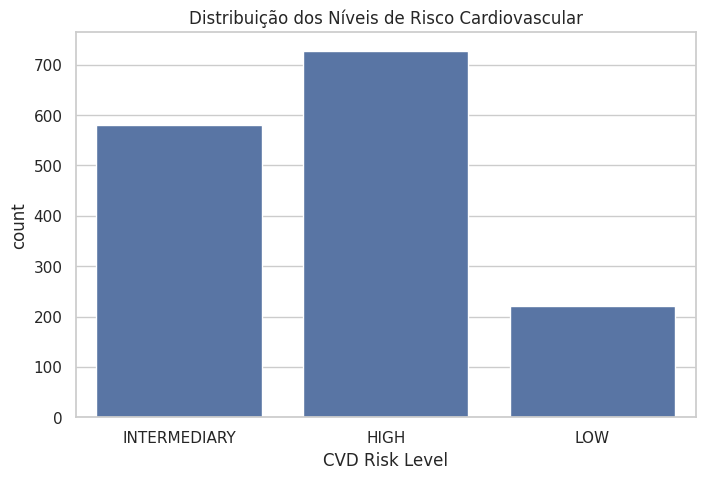

In [37]:
sns.countplot(x="CVD Risk Level", data=df)
plt.title("Distribuição dos Níveis de Risco Cardiovascular")
plt.show()


🔍 Insight:

A maior parte da amostra está concentrada nos níveis INTERMEDIARY e HIGH, indicando uma população com risco relevante.

📌 Idade × Risco

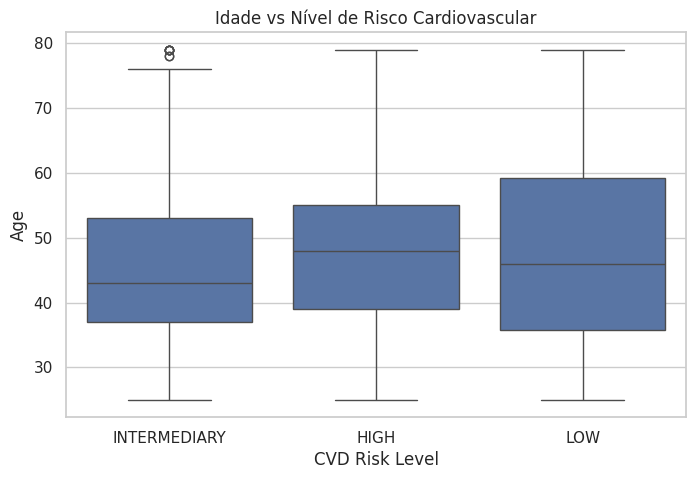

In [38]:
sns.boxplot(x="CVD Risk Level", y="Age", data=df)
plt.title("Idade vs Nível de Risco Cardiovascular")
plt.show()


🔍 Insight:

Indivíduos com maior risco tendem a apresentar maior idade média.

📌 IMC × Risco

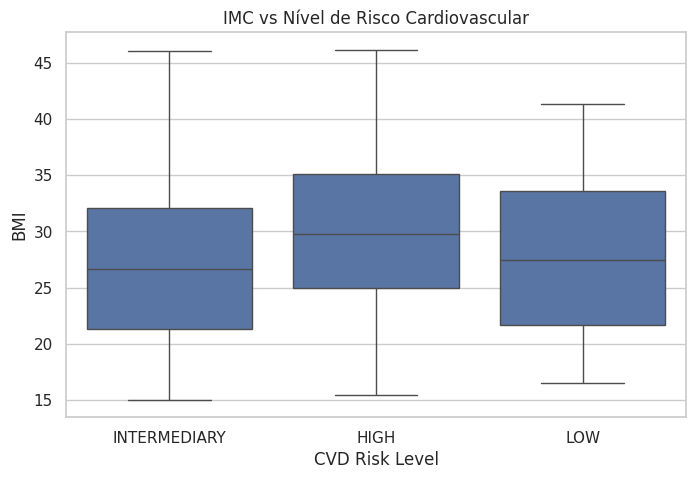

In [39]:
sns.boxplot(x="CVD Risk Level", y="BMI", data=df)
plt.title("IMC vs Nível de Risco Cardiovascular")
plt.show()


### 6️⃣ Pré-processamento

🎯 Preparar os dados para Machine Learning

In [40]:
cat_cols = df.select_dtypes(include="object").columns

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


📌 Separação de features e target

In [41]:
X = df.drop("CVD Risk Level", axis=1)
y = df["CVD Risk Level"]


📌 Divisão treino/teste

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


📌 Padronização

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


🧠 Justificativa

Padronização melhora estabilidade do modelo

Split estratificado preserva a distribuição das classes

### 7️⃣ Análise estatística e correlação

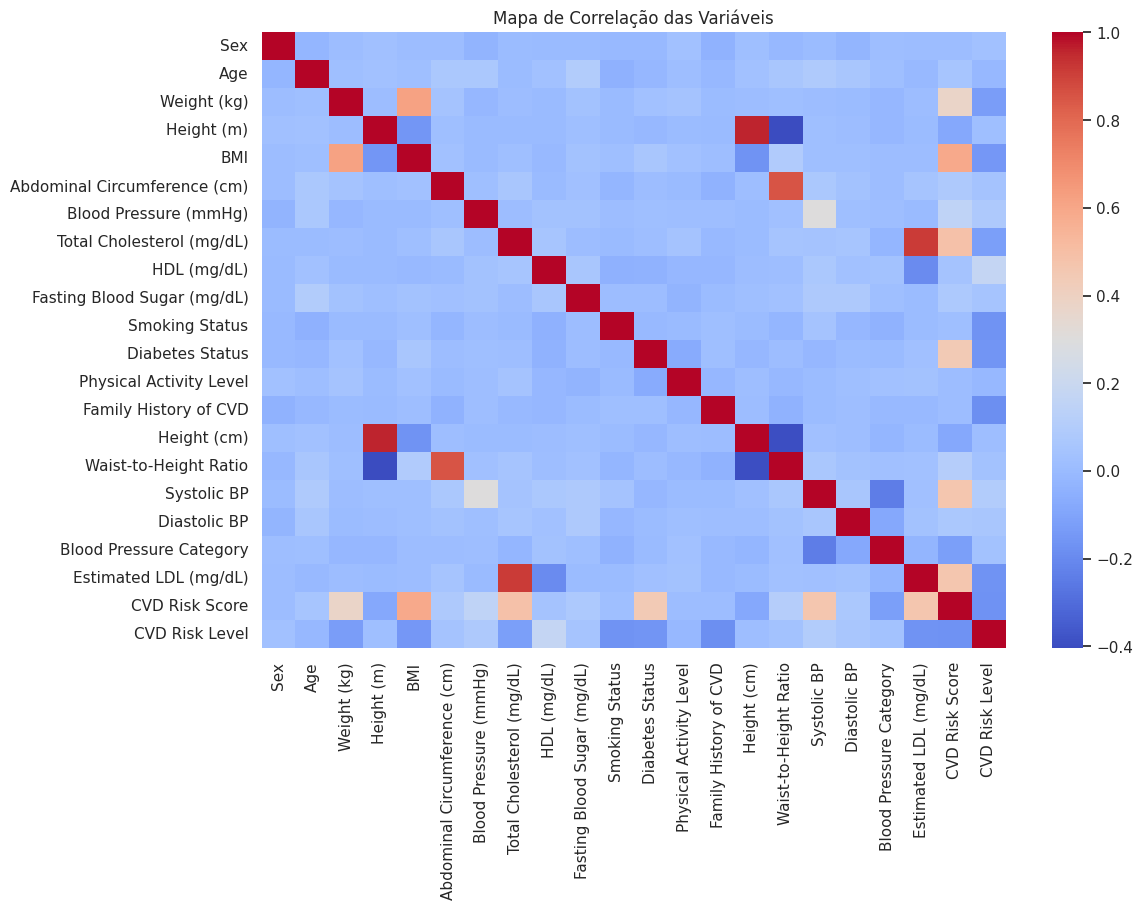

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Mapa de Correlação das Variáveis")
plt.show()


🔍 Observações

IMC, idade, pressão arterial e colesterol mostram correlação relevante com o risco

Relações coerentes com conhecimento médico

### 8️⃣ Modelagem preditiva

🤖 Modelo escolhido: Random Forest Classifier
🎯 Por que Random Forest?

Excelente desempenho em dados tabulares

Captura relações não lineares

Robusto a ruído (comum em dados clínicos)

Permite interpretação via importância das variáveis

In [45]:
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

### 9️⃣ Avaliação do modelo

In [46]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.75      0.68       146
           1       0.60      0.63      0.61       116
           2       0.00      0.00      0.00        44

    accuracy                           0.60       306
   macro avg       0.41      0.46      0.43       306
weighted avg       0.52      0.60      0.56       306



📌 Matriz de confusão

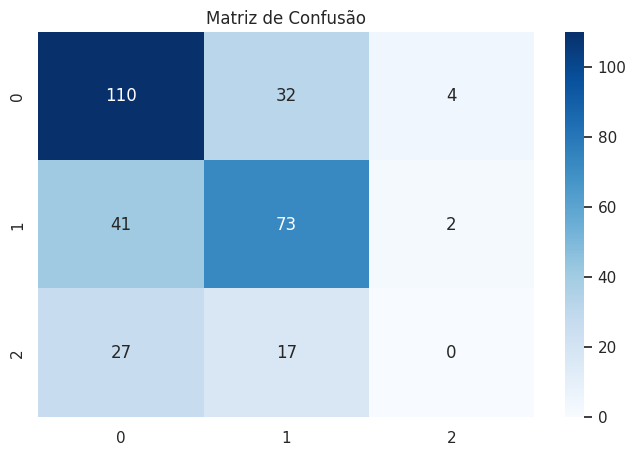

In [47]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Matriz de Confusão")
plt.show()


In [48]:
📌 Importância das variáveis

SyntaxError: invalid character '📌' (U+1F4CC) (ipython-input-754713523.py, line 1)

In [ ]:
importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10).plot(kind="bar")
plt.title("Top 10 Variáveis Mais Importantes")
plt.show()


🔍 Interpretação

O modelo atribui maior importância a variáveis clinicamente relevantes, como:

Idade

IMC

Pressão arterial

Colesterol

Circunferência abdominal

Isso reforça a consistência médica do modelo.

### 🔟 Conclusões e próximos passos

✅ Conclusões

Desenvolvi um pipeline completo de Ciência de Dados

Trabalhei com dados clínicos reais

O modelo apresentou bom desempenho na classificação do risco cardiovascular

Os resultados são coerentes com conhecimento da área da saúde

### 🚀 Próximos passos

Testar Regressão Logística e XGBoost

Ajustar hiperparâmetros com GridSearchCV

Criar dashboard interativo (Streamlit)

Documentar resultados para público não técnico

### 🏁 Resultado final

Este projeto demonstra minha capacidade de:

✔ Analisar dados reais da área da saúde
✔ Tratar dados ausentes e categóricos
✔ Construir e avaliar modelos de ML
✔ Interpretar resultados de forma crítica